In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict
from collections import Counter
from difflib import get_close_matches
import unicodedata


In [2]:

def show_results(root_dir):
    summary_results = []
    total_json_count = 0
    all_model_paths = []

    # === Traverse and summarize ===
    for group_dir in sorted(root_dir.iterdir()):
        if not group_dir.is_dir():
            continue

        metrics_list = []

        for subdir in group_dir.iterdir():
            if not subdir.is_dir():
                continue

            json_file = subdir / "results.json"
            if json_file.exists():
                total_json_count += 1
                with open(json_file, "r") as f:
                    data = json.load(f)
                    data["group"] = group_dir.name
                    metrics_list.append(data)
                    all_model_paths.append(data.get("model_path", "unknown"))

        if metrics_list:
            df = pd.DataFrame(metrics_list)
            df_mean = df.drop(columns=["dataset", "freq", "model_path"]).mean(numeric_only=True)
            df_mean["group"] = group_dir.name
            summary_results.append(df_mean)

    # === Combine summaries ===
    summary_df = pd.DataFrame(summary_results)
    summary_df.sort_values("group", inplace=True)

    # === Display summary table ===
    print("\n📊 Summary of Mean Metrics per Dataset Group:")
    display(summary_df)

    # === Compute overall global mean across all groups ===
    global_means = summary_df.drop(columns=["group"]).mean(numeric_only=True)
    print("\n📌 Global Mean Across All Groups:")
    print(global_means.round(4))

    # === Determine model name to display in title ===
    model_name = Counter(all_model_paths).most_common(1)[0][0] if all_model_paths else "Unknown Model"

    # === Visualization ===
    plt.figure(figsize=(12, 6))
    for metric in ["mse", "mae", "smape", "wape", "nrmse"]:
        if metric in summary_df.columns:
            plt.plot(summary_df["group"], summary_df[metric], marker='o', label=metric)

    plt.xticks(rotation=45)
    plt.xlabel("Dataset Group")
    plt.ylabel("Metric Value")
    plt.title(f"Average Forecasting Metrics by Dataset Group\nModel: {model_name} pred len: {summary_df['pred_len'][0]} context len: {summary_df['context_len'][0]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # === Total json count ===
    print(f"\n🔢 Total number of results.json files found: {total_json_count}")

    return summary_df

## Display results


📊 Summary of Mean Metrics per Dataset Group:


,mse,smape,mae,wape,nrmse,num_elements,abs_sum,total_time,pred_len,context_len,group
0,0.057177,0.216769,0.116465,0.147404,0.287847,3173.333333,2622.283529,4.675362,10.0,128.0,crypto10_1d
1,0.009019,0.160679,0.060391,0.070695,0.109820,20360.000000,17353.266602,29.570741,10.0,128.0,crypto10_1h
2,0.011350,0.175142,0.068277,0.079191,0.123429,8333.333333,7184.560872,11.782926,10.0,128.0,crypto10_1m
3,0.031823,0.235612,0.124985,0.141416,0.201452,6420.000000,5675.617920,9.071356,10.0,128.0,forex_datasets_1d
4,0.014320,0.179473,0.075353,0.089168,0.136627,20226.666667,17314.160807,28.351020,10.0,128.0,forex_datasets_1h
5,0.033625,0.240453,0.118158,0.137976,0.202576,11680.000000,10106.773763,16.310780,10.0,128.0,forex_datasets_1m
6,0.207560,0.627477,0.305761,0.400086,0.608434,1520.000000,1196.905497,2.241786,10.0,128.0,forex_datasets_1wk
7,0.035448,0.339468,0.119272,0.156550,0.232986,6760.000000,5121.516357,9.417976,10.0,128.0,futures_datasets_1d
8,0.011307,0.152724,0.068169,0.078422,0.122328,15640.000000,13595.334961,22.070462,10.0,128.0,futures_datasets_1h
9,0.183775,0.343791,0.198614,0.243237,0.347837,8633.333333,7449.247111,12.203984,10.0,128.0,futures_datasets_1m



📌 Global Mean Across All Groups:
mse                0.0626
smape              0.2813
mae                0.1363
wape               0.1682
nrmse              0.2528
num_elements    9203.7778
abs_sum         7817.9452
total_time        13.0935
pred_len          10.0000
context_len      128.0000
dtype: float64


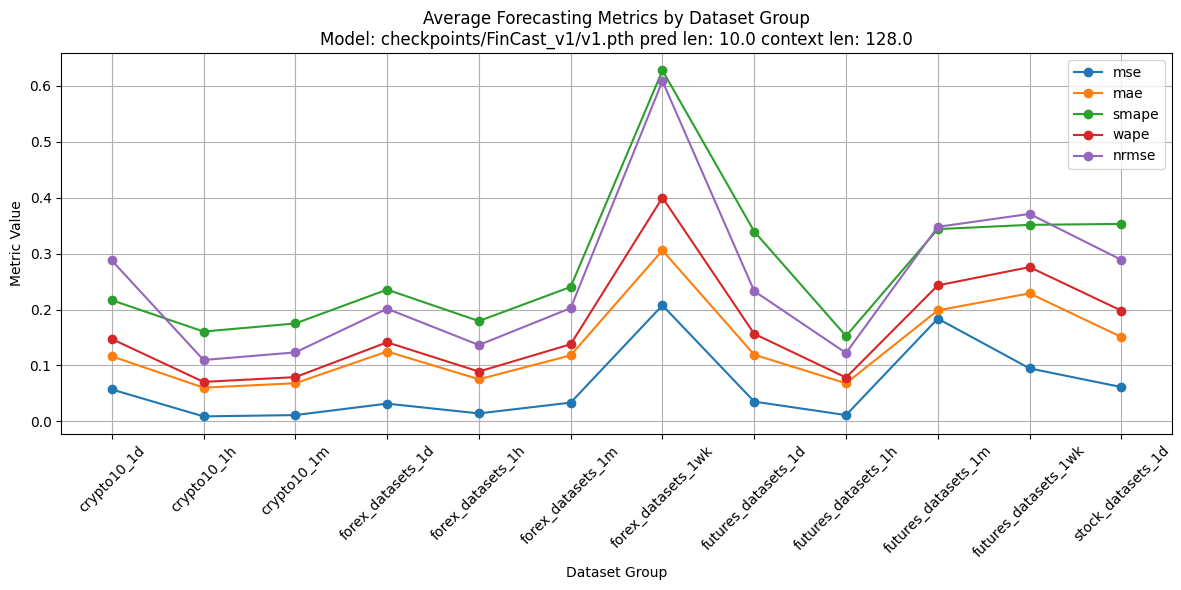


🔢 Total number of results.json files found: 256


FileNotFoundError: [Errno 2] No such file or directory: '/home/vincent-4090/Documents/GitHub/FC_LCRF/results/stock_eval/Fincast_v1_ct128/h30'

In [7]:
#show results for experiment 4.1, comparison to zero-shot methods

result_csv_path = "/home/vincent-4090/Documents/GitHub/FC_LCRF/results/stock_eval/Fincast_v1_ct128"    #folder path to the results


L = [10, 30, 60]
for i in L:
        result_p = Path(r"{}/h{}".format(result_csv_path, str(i)))  #\ for windows fs, / for linux :)
        df = show_results(result_p)

In [ ]:
#show results for experiment 4.2, comparison to supervised methods

result_csv_path = "results/stock_eval/Fincast_v1_ct128"    #folder path to the results


L = [10, 20, 40, 60]
for i in L:
        result_p = Path(r"{}\h{}".format(result_csv_path, str(i)))  #\ for windows fs, / for linux :)
        df = show_results(result_p)